Imports: 

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import missingno as msno
from scipy import stats
import geopandas as gpd
import folium
from folium.plugins import HeatMap


Loading Califronia Dataset: 

In [10]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)


Initial Data Inspection: 

In [11]:
print("Head: ")
print(df.head())
print("Statistical Summary: ")
print(df.describe())
print("Information of dataset: ")
print(df.info())

Head: 
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
Statistical Summary: 
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.00

Missing Value Analysis: 

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


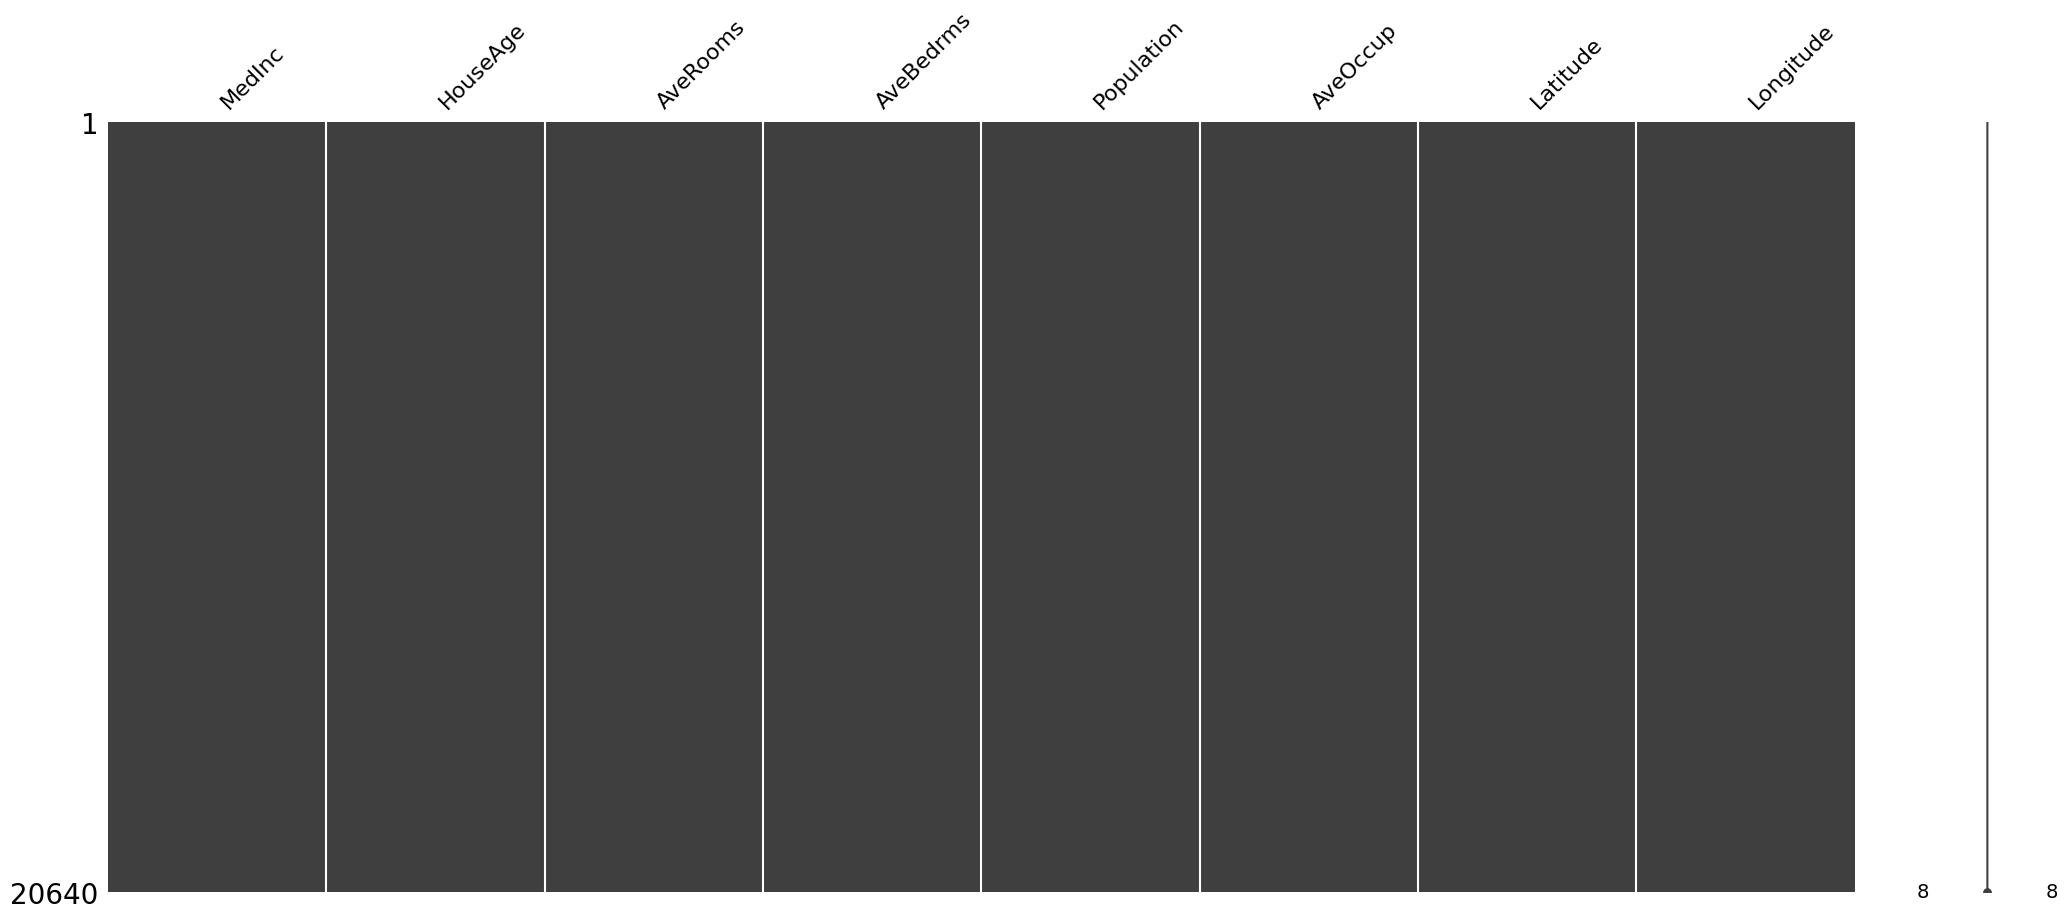

In [14]:
print(df.isnull().sum())
msno.matrix(df)
plt.show()
#No missing values in any column found

Outliers Handling: 

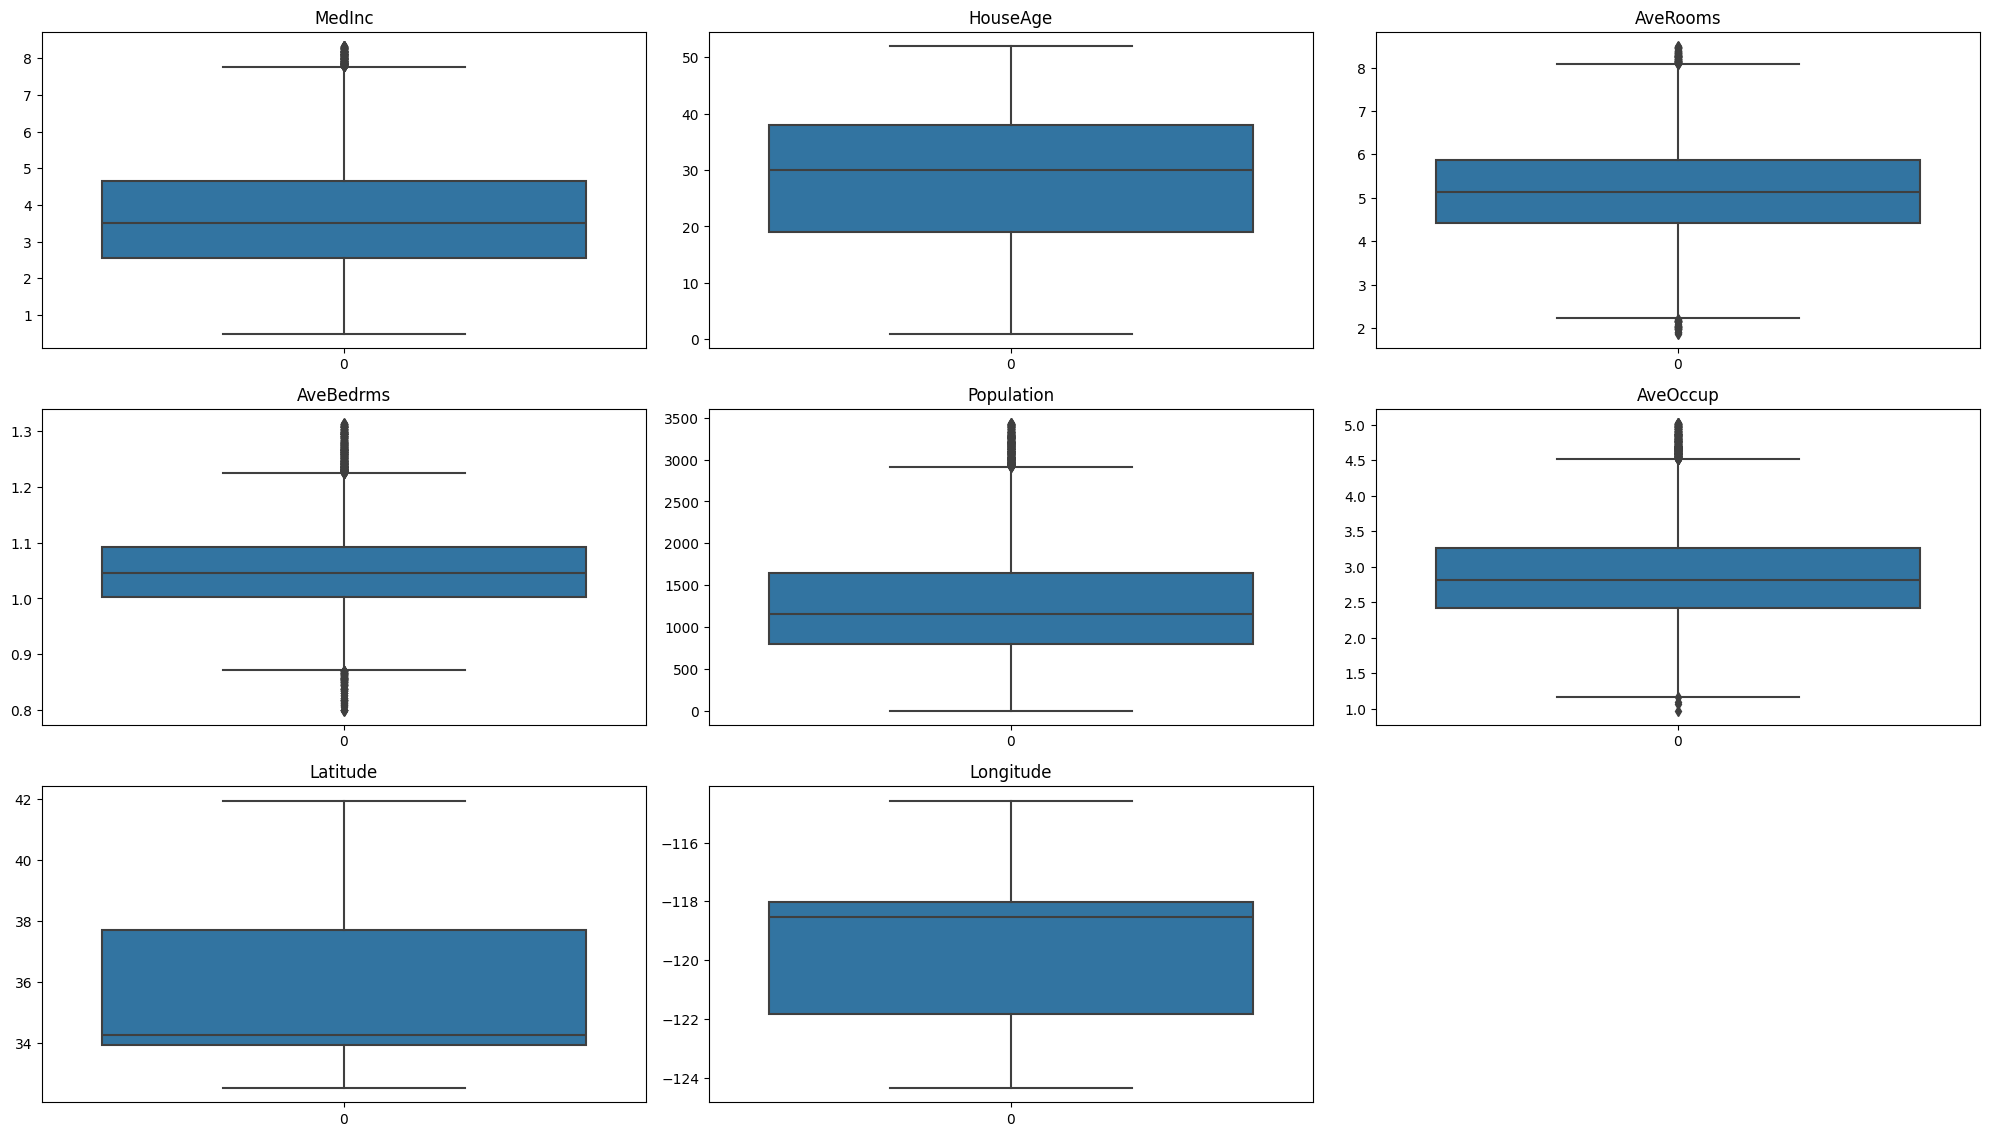

In [21]:
#BoxPlot for outliers
plt.figure(figsize=(20,15))
for i,col in enumerate(df.columns):
    plt.subplot(4,3,i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()
#Outliers do exist in this dataset
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores<3).all(axis=1)]

Unvariante Analysis: 

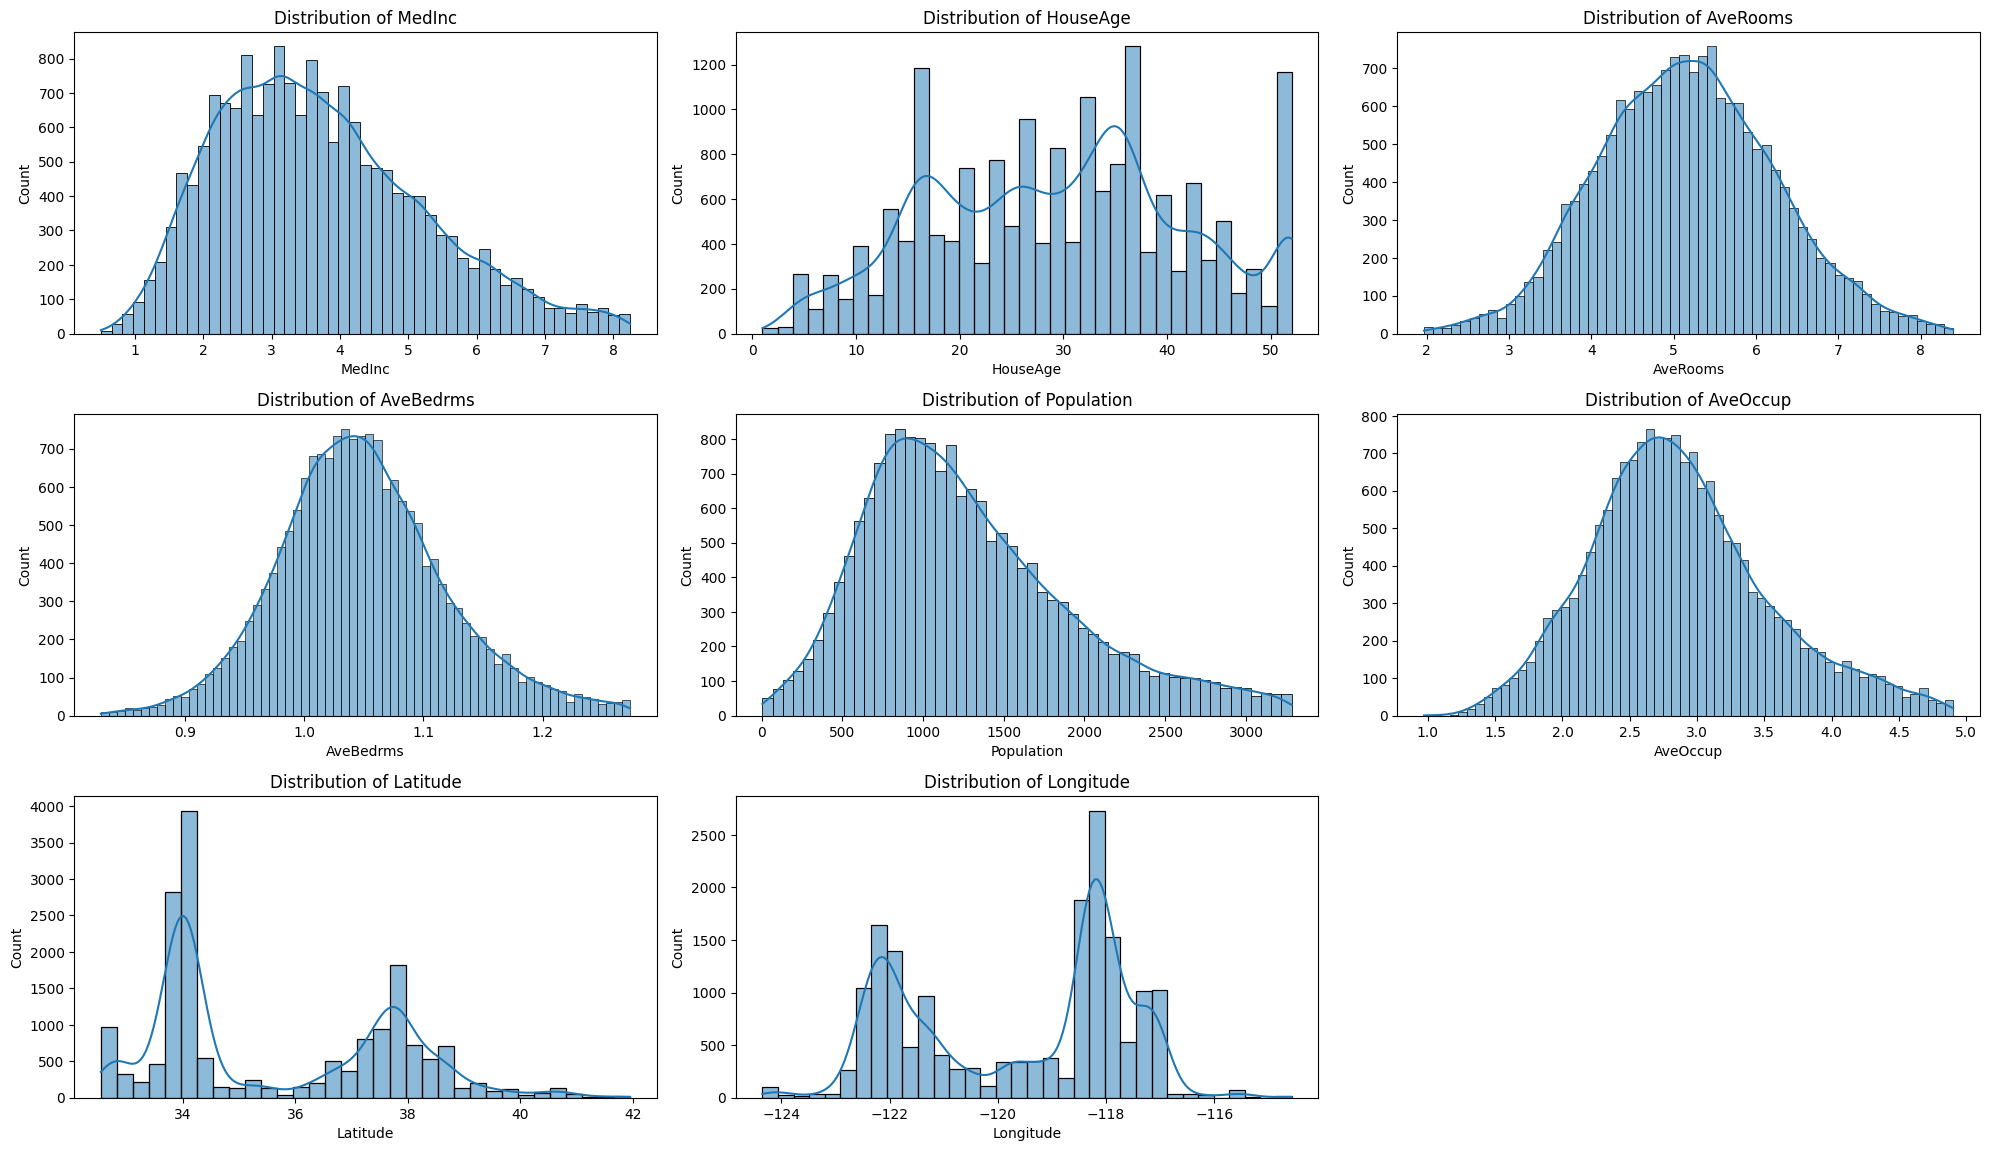

In [22]:
#Distribution Plot
plt.figure(figsize=(20,15))
for i,col in enumerate(df.columns):
    plt.subplot(4,3,i+1)
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Biivariante Analysis:

1. Correlation Matrix

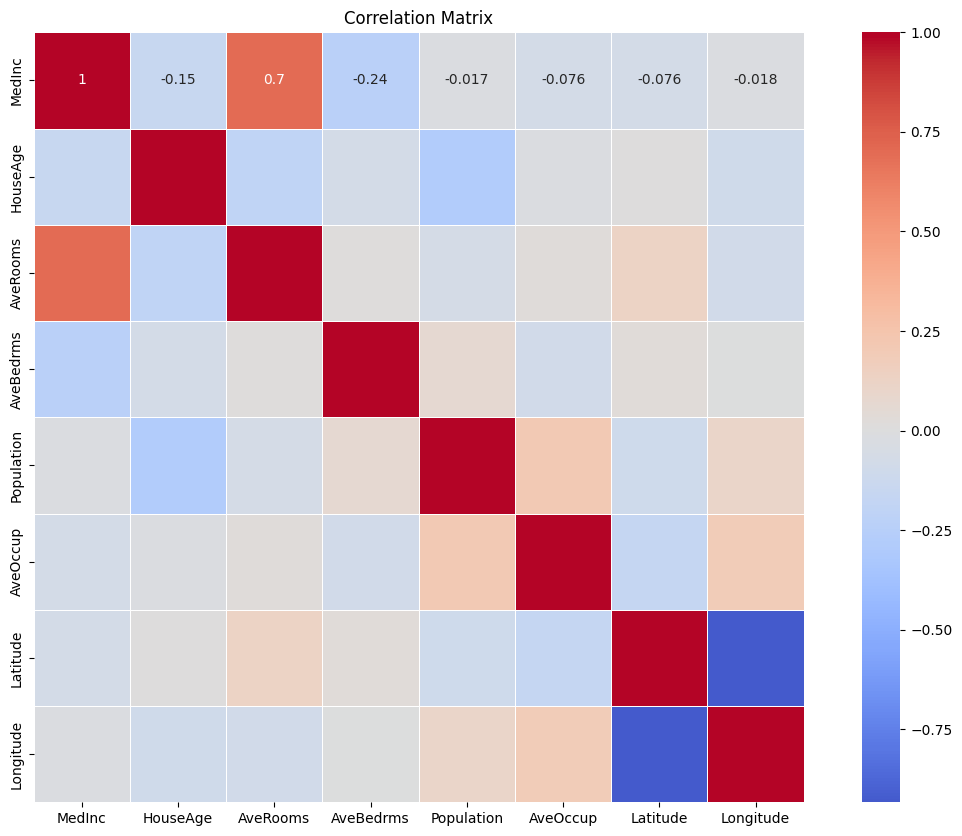

In [23]:
corr_mat = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat, annot=True,cmap='coolwarm',linewidths=.5,center=0,square=True)
plt.title("Correlation Matrix")
plt.show()

2.  Scatter Plot

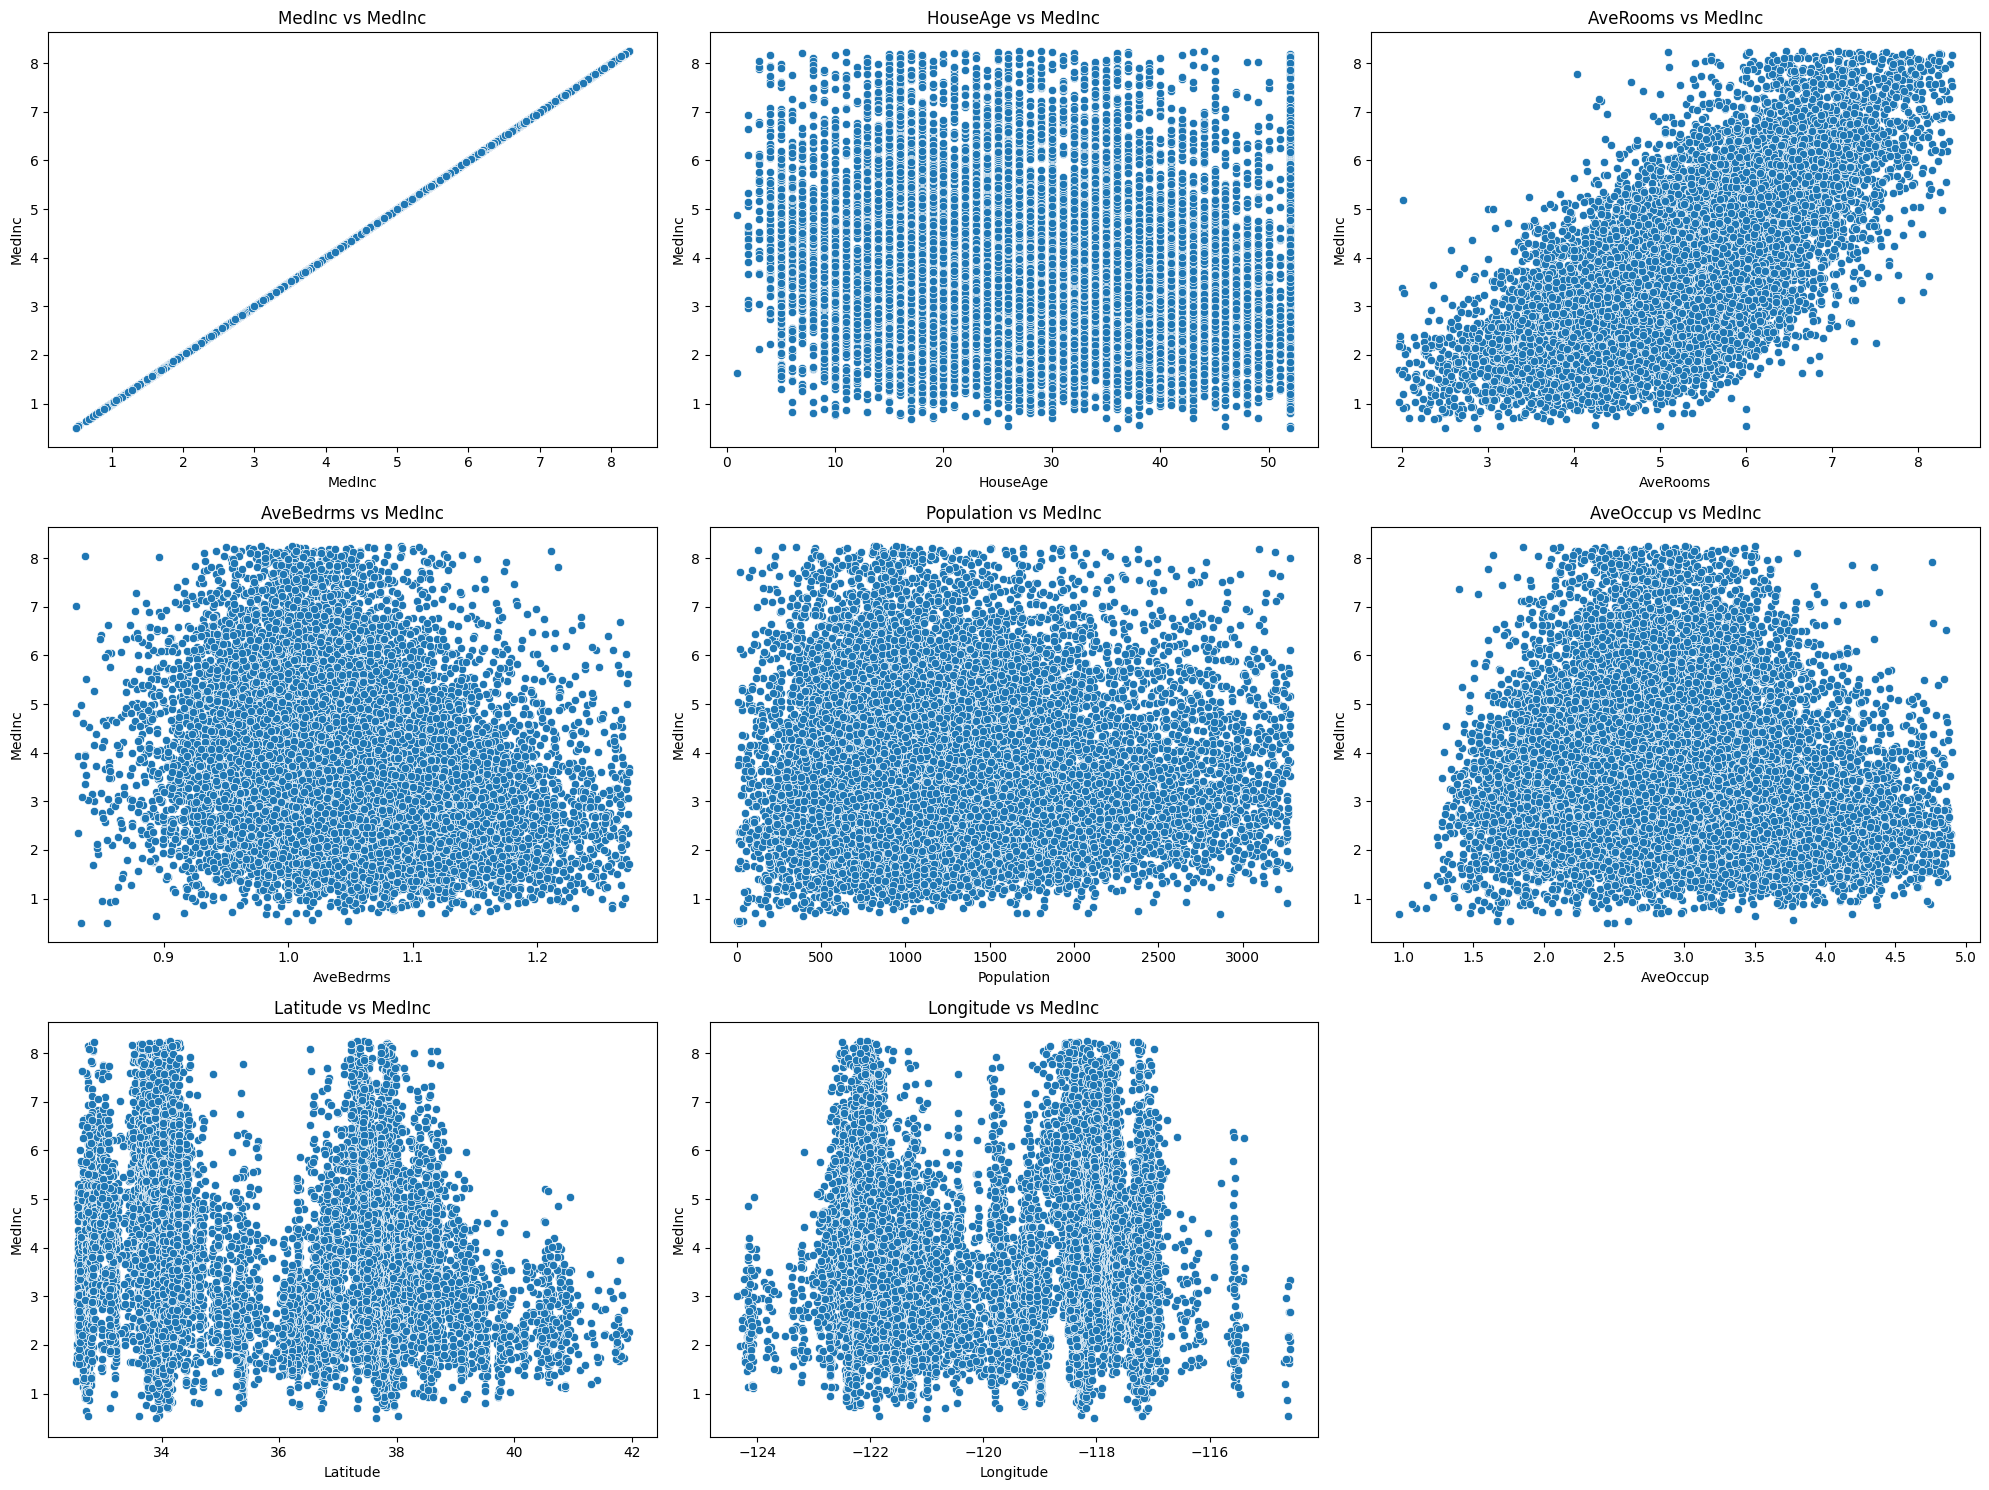

In [25]:
plt.figure(figsize=(20,15))
for i,col in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.scatterplot(x=df[col],y=df['MedInc'])
    plt.title(f'{col} vs MedInc')
plt.tight_layout()
plt.show()


MultiVariante Analysis

Pair Plot

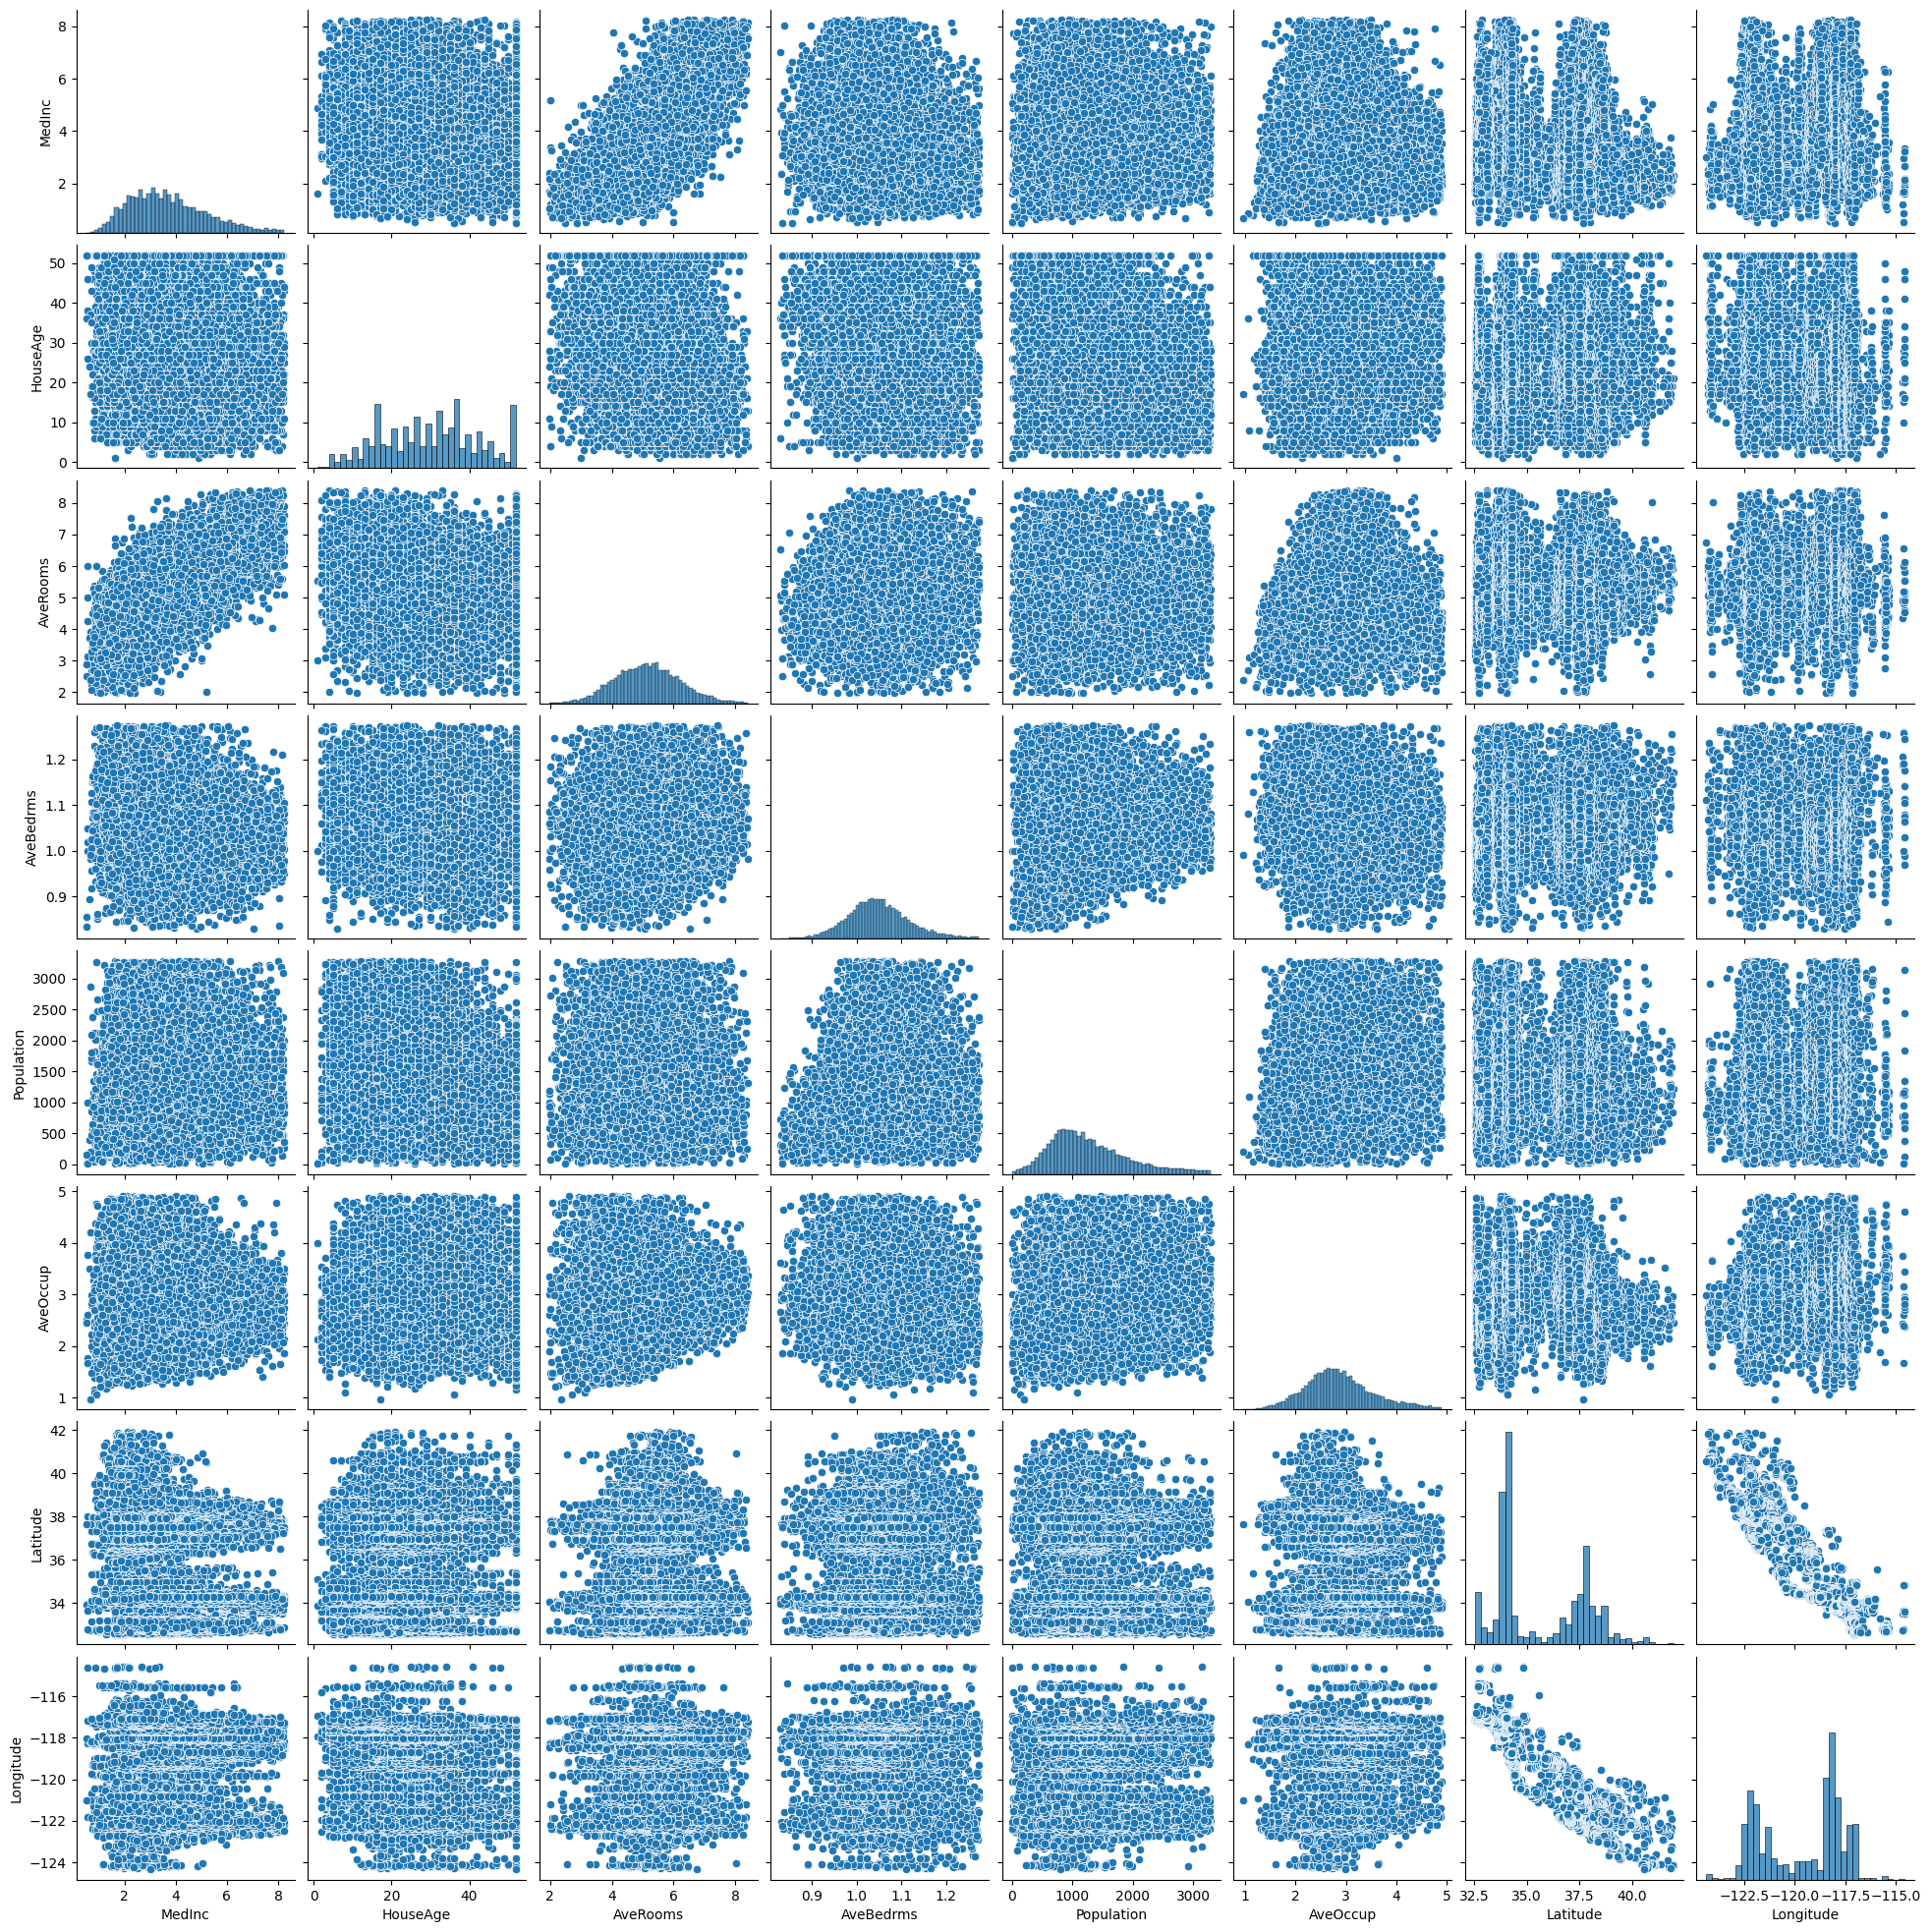

In [26]:
sns.pairplot(df)
plt.show()